# Existing Vegetation Dataset
Related links:
* For the documentation about this dataset, its source, how to download it, and the features of interest, please refer to our [Vegetation Datasets](doc/assets/vegetation.md) documentation
* For the explanations on how the vegetation mapping datasets are overlaid with township boundaries to obtain the amount of land used for each crop type in each township, please refer to our [Overlaying San Joaquin Valley Township Boundaries](doc/etl/township_overlay.md) documentation


The vegetation dataset is coming from the U.S. Department of Agriculture, Forest Service. It is a compilation of the _Existing Vegetation_ datasets for the __Central Valley__, __Central Coast__ [CALVEG mapping zones](https://www.fs.usda.gov/detail/r5/landmanagement/resourcemanagement/?cid=stelprdb5347192) of California. The 2 datasets are ESRI geodatabases which can be downloaded from [here](https://data.fs.usda.gov/geodata/edw/datasets.php?xmlKeyword=existing+vegetation)
* Existing Vegetation: Region 5 - Central Valley
* Existing Vegetation: Region 5 - Central Coast

The documentation for the fields in those datasets is available in the metadata link for each of the dataset (e.g. metadata for the [South Sierra dataset](https://data.fs.usda.gov/geodata/edw/edw_resources/meta/S_USA.EVMid_R05_SouthSierra.xml))

For each of these datasets:
* only the a00000009.* files containing the detailed information have been kept.
* only the _SAF_COVER_TYPE_ field representing the _classification of Society of American Foresters (SAF) Forest Cover Types is based on existing occupancy of an area by tree species (Eyre 1980)_ has been kept

In [1]:
import matplotlib.pyplot as plt
from lib.vegetation import VegetationDataset

Load the data by instantiating the VegetationDataset class based on the geospatial map data for the central valley and central coast areas.

In [2]:
vegetation_df = VegetationDataset()

Pre-process the crops dataset to keep only the selected features for the final analysis.

In [3]:
vegetation_df.preprocess_map_df()

In [4]:
vegetation_df.map_df

VEGETATION_TYPE                                           geometry  YEAR
0                 000  MULTIPOLYGON (((-121.01241 36.62881, -121.0124...  2019
1                 000  MULTIPOLYGON (((-120.91174 36.61289, -120.9117...  2019
2                 000  MULTIPOLYGON (((-120.32605 36.20565, -120.3260...  2019
3                 000  MULTIPOLYGON (((-121.53567 36.02781, -121.5356...  2019
4                 000  MULTIPOLYGON (((-119.69018 34.94837, -119.6901...  2019
...               ...                                                ...   ...
54804             000  MULTIPOLYGON (((-121.27291 38.95855, -121.2725...  2019
54805             000  MULTIPOLYGON (((-120.64721 37.98345, -120.6472...  2019
54806             000  MULTIPOLYGON (((-119.44758 37.03244, -119.4475...  2019
54807             000  MULTIPOLYGON (((-119.44680 37.03424, -119.4468...  2019
54808             000  MULTIPOLYGON (((-118.87629 34.85732, -118.8762...  2019

[54809 rows x 3 columns]

Overlay the San Joaquin Valley township boundaries on the Vegetation dataset to cut the crops land areas with the township boundaries, thus extracting all the existing vegetation types per townships.

In [5]:
vegetation_df.overlay_township_boundries()

Display the map of the Vegetation dataset

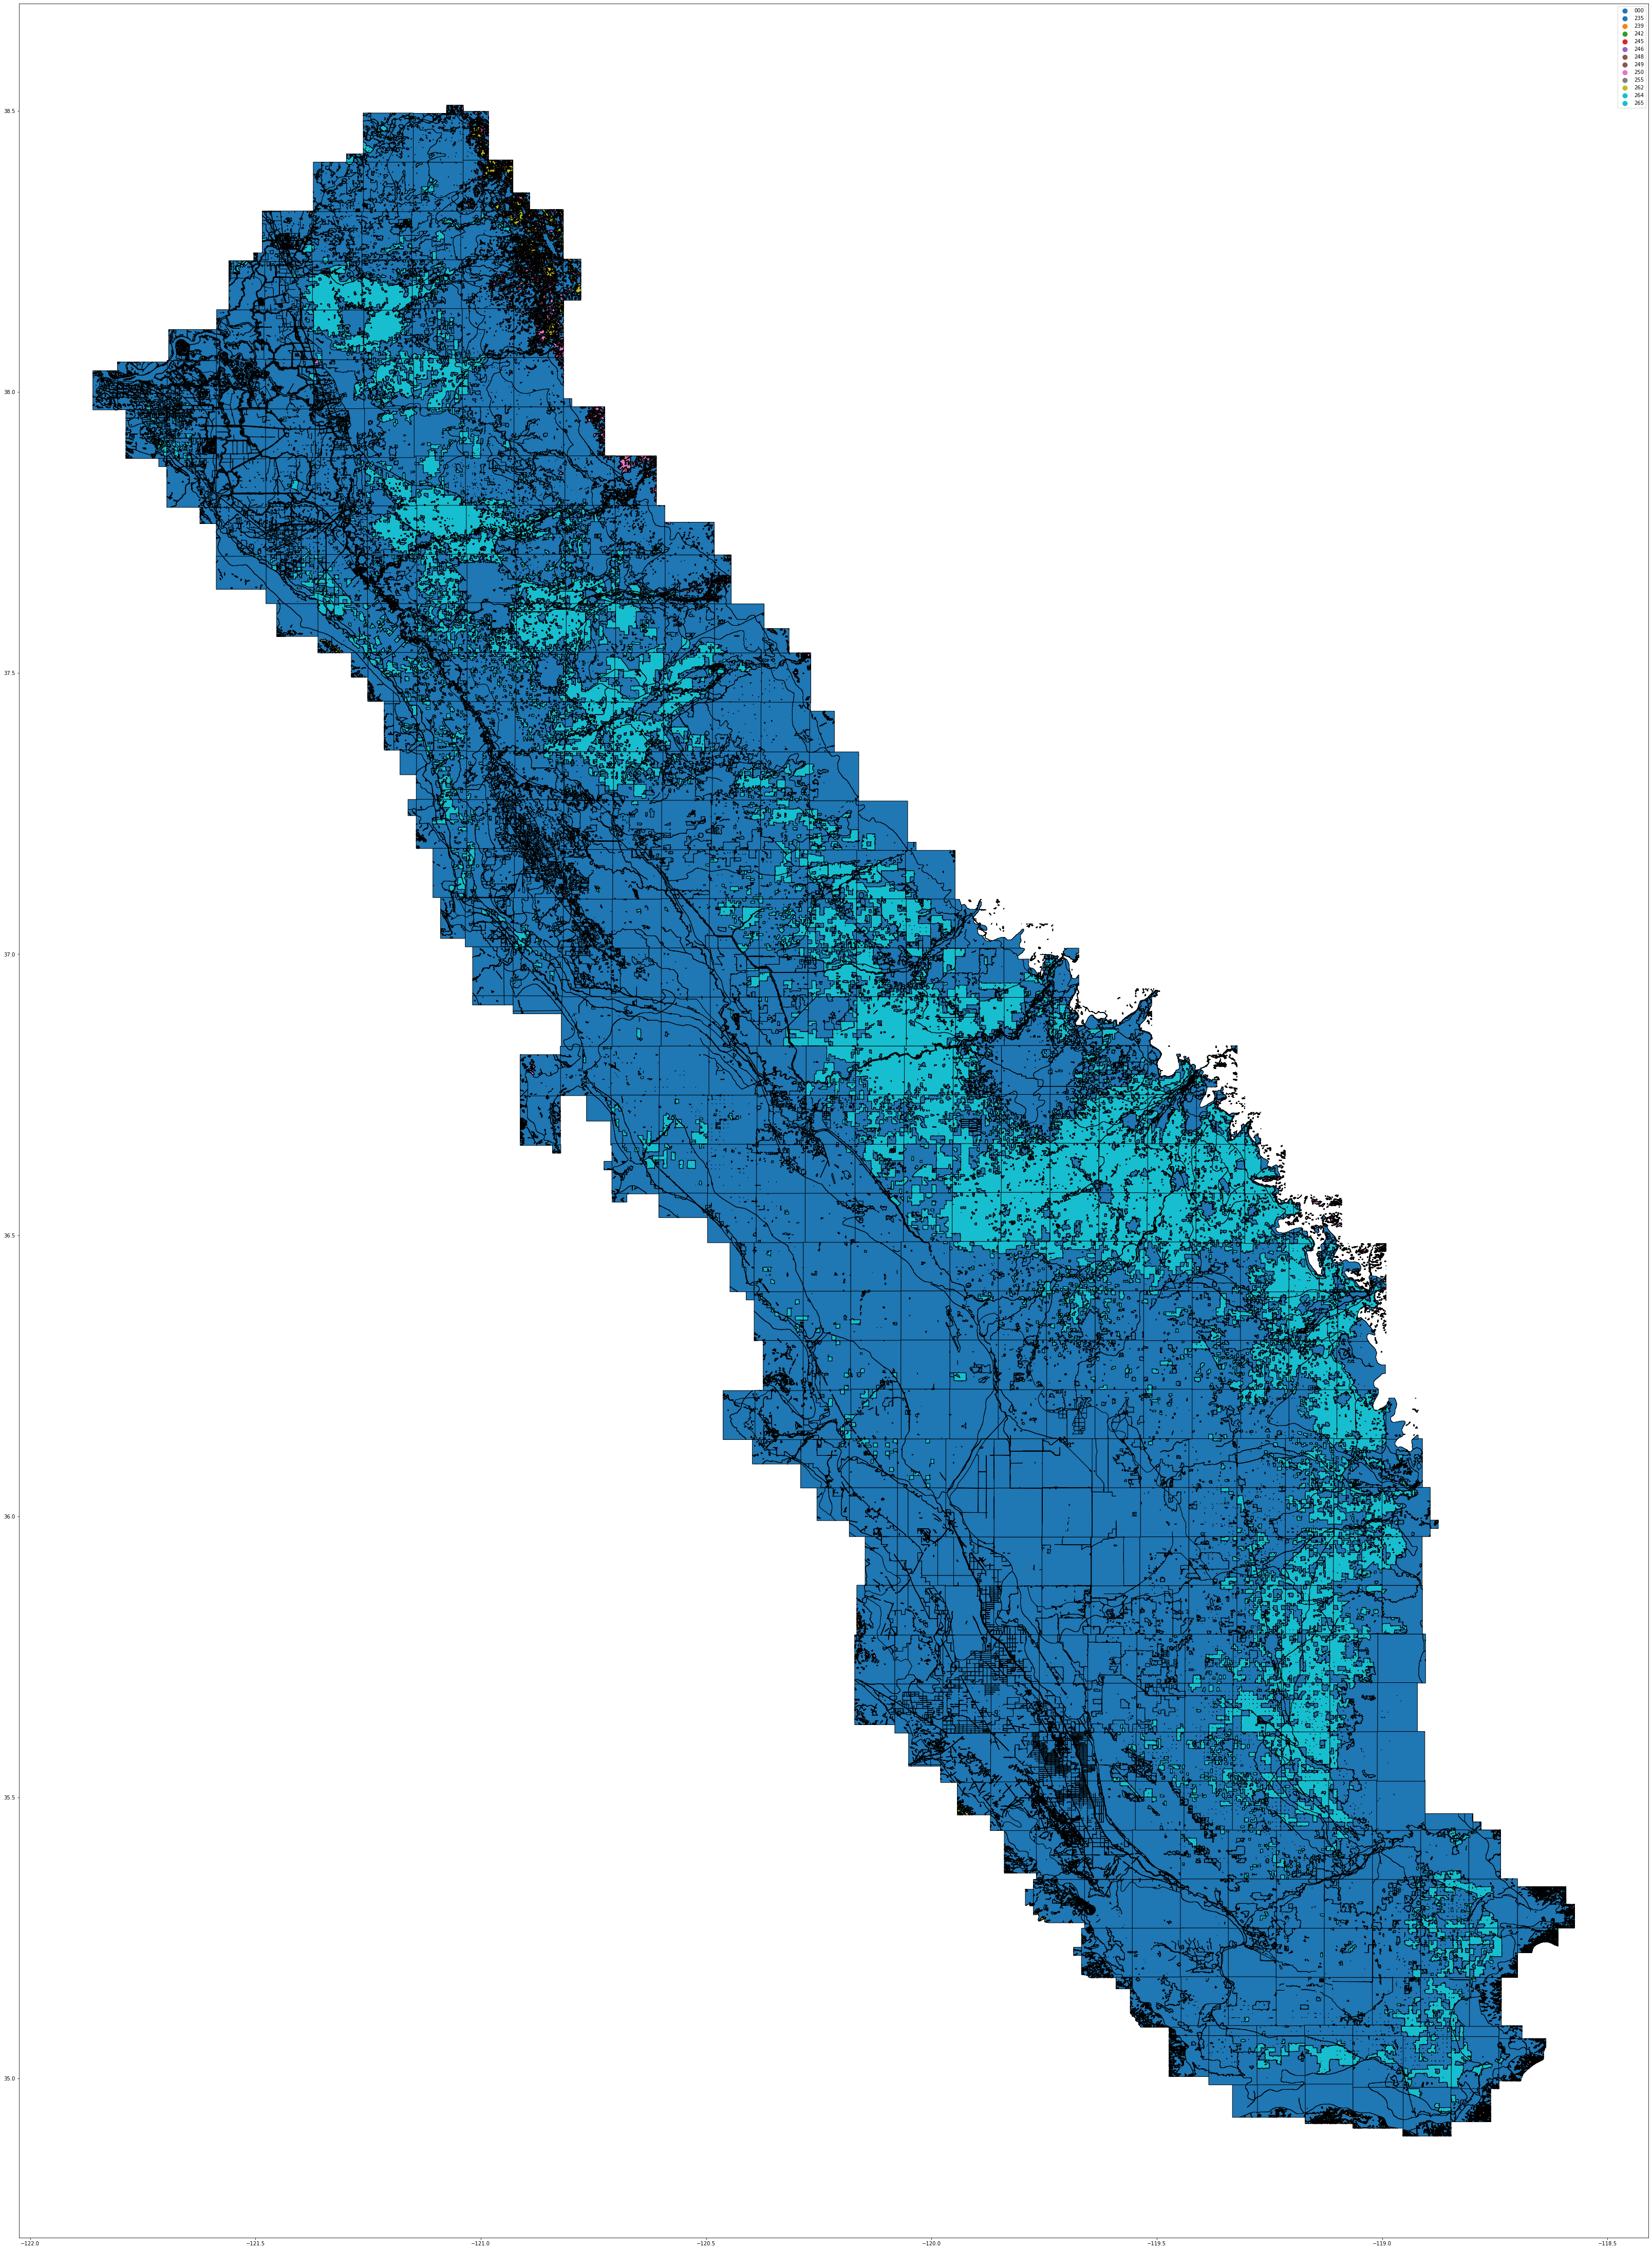

In [8]:
fig, ax = plt.subplots(figsize=(80,80))
vegetation_df.map_df.plot(ax=ax, column="VEGETATION_TYPE", edgecolor='black', linewidth = 1, cmap=None, legend=True)
#vegetation_df.sjv_township_range_df.plot(ax=ax, facecolor="none", edgecolor='black', linewidth = 1, cmap=None, legend=None)
plt.show()

In [10]:
vegetation_df.fill_missing_years()
#vegetation_df.fill_townships_with_no_data()
vegetation_df.compute_feature_at_township_level("VEGETATION_TYPE")
vegetation_df.drop_features(drop_rate=0.05)

D:\code\jupyter_nb_data\UMSI\milestone2_waterwells_deepnote\lib\wsdatasets.py:187: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  self.map_df["AREA"] = self.map_df.geometry.to_crs(epsg=4326).area


In [11]:
vegetation_df.output_df

TOWNSHIP  YEAR       000  239       248       249       250       255  \
0     T01N R02E  2015  0.920362  0.0  0.000000  0.000000  0.010792  0.002746   
1     T01N R02E  2016  0.920362  0.0  0.000000  0.000000  0.010792  0.002746   
2     T01N R02E  2017  0.920362  0.0  0.000000  0.000000  0.010792  0.002746   
3     T01N R02E  2018  0.920362  0.0  0.000000  0.000000  0.010792  0.002746   
4     T01N R02E  2019  0.920362  0.0  0.000000  0.000000  0.010792  0.002746   
...         ...   ...       ...  ...       ...       ...       ...       ...   
2857  T32S R30E  2016  0.947904  0.0  0.001691  0.002024  0.033184  0.000000   
2858  T32S R30E  2017  0.947904  0.0  0.001691  0.002024  0.033184  0.000000   
2859  T32S R30E  2018  0.947904  0.0  0.001691  0.002024  0.033184  0.000000   
2860  T32S R30E  2019  0.947904  0.0  0.001691  0.002024  0.033184  0.000000   
2861  T32S R30E  2020  0.947904  0.0  0.001691  0.002024  0.033184  0.000000   

           262       265  
0     0.000633  0.063791  
1     0.000633  0.063791  
2     0.000633  0.063791  
3     0.000633  0.063791  
4     0.000633  0.063791  
...        ...       ...  
2857  0.003536  0.011226  
2858  0.003536  0.011226  
2859  0.003536  0.011226  
2860  0.003536  0.011226  
2861  0.003536  0.011226  

[2862 rows x 10 columns]